In [1]:
import requests
import time
import os
import sys
import re
import io
import json
import csv
import openpyxl
import pandas as pd
import numpy as np
import kss
import ast
from pykospacing import spacing
from konlpy.tag import Komoran

In [2]:
#각 키워드에 해당하는 내용 정리
#예시: ['결혼', '남자', '남편', '본인', '부모', '시간', '엄마', '여자', '자기', '친구']
from IPython.core.display import display, HTML
from konlpy.tag import Okt

#키워드에 해당하는 제목, 본문, 댓글 출력, 추후 iteration 돌며 10가지 모두 할 것
key = '자기'

final = pd.DataFrame(columns = ['contents'])

f = pd.read_csv('natepann.csv')

is_key = f['본문'].str.contains(key, na=False)

f_key = f[is_key]
f_key = f_key.reset_index()
f_key

,index,제목,본문,댓글
0,1,임신에 대한 친정과 시댁의 온도차,추가 어젯밤에 서운한 맘에 글 써놓고 오늘은 남편 하고 남편 친구하고 도련님 셋이 ...,재미도 없고 마지막 줄 진짜 인성 나오네 주 작 오지네 임신 초기에 회 절대 못 먹...
1,2,예비 신랑 탈모 때문에 너무 고민입니다,안녕하세 요저는 예랑이와 년 정도 연애 하고 몇 번의 헤어짐을 겪고 결혼 약속을 하...,하루 빨리 약 복용하시길 추천 드립니다 약 먹는 순간부터 현 머리 상태가 유지된다고...
2,6,얘들아 남자들 생떼 쓰는 것 좀 막아보자 청원 부탁,내가 설명이 좀 부족했던 거 같음 요즘 재재 손 모양도 그렇고 바연길 테러도 그렇고...,왜 딜 박히니까 짜증나 니네 입지 좁히는 것 같아서 근데 이건 페미들한테 고마워 해...
3,9,시댁 문제로 남편과 심각하게 싸웠어요,안녕하세요 제가 남편이랑 크게 부부싸움을 했는데 제 생각이 잘못된 건지 진짜 의견 ...,다른 건 모르겠구요 일단 부부 싸움에 부모님 소환은 안 좋은 신호 맞아요 약간 저희...
4,16,조리원은 자분한 사람만 가는 곳인가요,안녕하세요 모바일이라 오타는 양해 부탁드려 요지난 월에 첫 아이 출산을 하고 조리원...,제왕은 수술 봉합 부위 아무느라 병원도 더 오래 입원해 있는데 뭔 개소리야 자연분만...
5,19,여친 때문에 유학 안 가겠다는 아들,고등학생인 아들에게는 오랜 기간 교제한 같은 학교 여자친구가 있고 이 때문에 자기 ...,쓰니님 네이트 판 사람들 말은 너무 믿지 마시고 참고 정도로만 쓰세요 여기 사람들이...
6,23,여자 술집에서 폭행 시비가 걸렸습니다 도와 주세요,방탈죄송합니다 화력이 제일 쎈 데를 찾다 보니 이 쪽으로 오게 되었습니다 제목대로 ...,폭행치사음 그래요 변호사랑 경찰이랑 얘기 된 것 같은데 여기서 사람들이 뭘 어떻게 ...
7,24,대기업 인테리어 시공 엉망진창 서비스,분노주의 절대 기업 리트 키친에서 인테리어 시공 하지 마세요방탈 죄송합니다 긴 글이...,헐 이게 무슨 일이건 공론화 해야 할 거 같네요
8,26,이혼 후 재결합 해보신분 있으실까요,안녕하세요살 이 혼녀입니다 예전에도 글을 쓴 적이 있는데 그때 참 많은 도움을 받은...,자기 인생 꼬는 사람들 심리가 이렇구나 써 논 글 다시 읽어봐요 얼마나 힘들었음 이...
9,29,부부싸움 후 남편이 물건 부셨네요,개월 아기 키우고 있어요 남편 혼자 벌고요 나이차가 좀 나 요 결혼할 때 전 다 해...,나이가 똑같으면 반 반 한다고 하세요 어린 친구들이 오는 곳이라 댓글 수준이 중졸 ...


In [3]:
final_key = pd.DataFrame(columns = ['tokenized'])
komoran = Komoran()

for i in range(len(f_key)):
    try:
        st = f_key.loc[i, '제목']
        final_key.loc[i, 'tokenized'] = st
        ct = f_key.loc[i, '본문']
        final_key.loc[i, 'tokenized'] += ct
        
        cm = f_key.loc[i, '댓글']
        #str Concatenation 문제 발생시 주석처리한 부분처럼 str() 처리하면 해결 가능
        final_key.loc[i, 'tokenized'] += cm
        #final_key.loc[i, 'tokenized'] += str(cm)
        
    except KeyError:
        print("error")

keyword_content = pd.DataFrame(columns = ['content','positive', 'negative', 'neutral'])


for i in range(len(final_key)):
    try:
        fc = final_key.loc[i, 'tokenized']#.replace(" ", "")
        fc = spacing(fc)
        #fc = str(komoran.morphs(fc))
        
        if i == 0:
            keyword_content.loc[0,'content'] = fc
        else:
            keyword_content.loc[0,'content'] += fc
        
    except KeyError:
        print("error")

keyword_content

,content,positive,negative,neutral
0,임신에 대한 친정과 시댁의 온도 차 추가 어젯밤에 서운 한 맘에 글 써놓고 오늘은 ...,NaN,NaN,NaN


In [4]:
# 감성사전에서 감성분석
f = open('SentiWord_Dict.txt', 'r', -1, 'utf-8')
lines = f.readlines()

score_dict = []

for line in lines:
    line_splited = line.split()
    score = int(line_splited[-1])
    word = ''
    for frac in line_splited[:-1]:
        word = word + ' ' + frac
    
    word = word[1:]
    score_dict.append([word, score])

In [5]:
#keys = []

keyword_content['positive'] = 0
keyword_content['negative'] = 0
keyword_content['neutral'] = 0

#komoran = Komoran()
#keys = spacing(keyword_content.loc[0, 'content'])
#keys = = str(komoran.nouns(keys)

#keyword_content.loc[0, 'content'] = spacing(keyword_content.loc[0, 'content'])
keyword_content.loc[0, 'content'] = str(komoran.nouns(keyword_content.loc[0, 'content']))


stopwords = ['하다', '없다', '있다', '되다', '아니다', '같다', '이다', '않다', '그렇다', 
             '이렇다', '싶다', '다', '것', '그', '이', '거', '니다']


pos_list = ast.literal_eval(keyword_content.loc[0, 'content'])
    
final = []
    
for j in range(len(pos_list)):
    if pos_list[j] not in stopwords:
        final.append(pos_list[j])
    
keyword_content.loc[0, 'content'] = str(final)
#keys = str(final)

In [6]:
keyword_content.insert(0, "Keyword", key)

In [7]:
#keyword_content.head()

In [8]:
#tokens.append(keyword_content.loc[0, 'content'])
#tokens.extend(keys)

tokens = ast.literal_eval(keyword_content.loc[0, 'content'])

try:
    for token in tokens:
        for dict_word in score_dict:
            if dict_word[0] == token:
                if dict_word[1] > 0:
                    keyword_content.loc[0, 'positive'] += dict_word[1]
                elif dict_word[1] < 0:
                    keyword_content.loc[0, 'negative'] += dict_word[1]
                else:
                    keyword_content.loc[0, 'neutral'] += 1 #중립어는 개수 세기    
except KeyError:
    print("error")

In [9]:
keyword_content[keyword_content.columns.difference(['content'])]

,Keyword,negative,neutral,positive
0,자기,-427,6,225


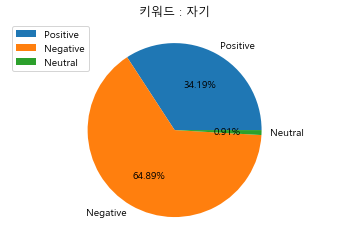

In [10]:
#% 시각화
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

#한글 꺠짐 처리
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False
pos = keyword_content.loc[0, 'positive']
neg = str(keyword_content.loc[0, 'negative']).replace("-", "")
neu = keyword_content.loc[0, 'neutral']

size = [pos, neg, neu]

label = ['Positive','Negative','Neutral']

plt.axis('equal')
plt.pie(x=size, labels=label, autopct='%.2f%%')

plt.title("키워드 : " + key)
plt.legend()
plt.show()